In [ ]:
## A.3

In [1]:
from mnist import MNIST
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    mndata = MNIST('/Users/joseph/Courses/cse546/hw2/mnist')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return [X_train, labels_train, X_test, labels_test]

[X_train, labels_train, X_test, labels_test] = load_dataset()

In [3]:
n=60000
d=784
mu = np.mean(X_train, axis=0) #take average across pixels
mu_matrix = np.zeros((n,d))
for j in range(d):
    mu_matrix[:,j] = mu[j]

In [4]:
sigma = (np.transpose(X_train - mu_matrix) @ (X_train - mu_matrix))/n

In [5]:
eigvals,eigvecs = la.eig(sigma)

In [6]:
print(f'''Lambda1 = {eigvals[0]}, Lambda2 = {eigvals[1]}, Lambda10 = {eigvals[9]}, 
    Lambda30 = {eigvals[29]}, Lambda50 = {eigvals[49]}''')
print(f'Sum of Eigenvalues = {sum(eigvals)}')

Lambda1 = 5.116787728342092, Lambda2 = 3.7413284788648316, Lambda10 = 1.2427293764173317, 
    Lambda30 = 0.3642557202788918, Lambda50 = 0.16970842700672786
Sum of Eigenvalues = 52.725035495126946


In [7]:
recon_error_train = np.zeros(100)
recon_error_test = np.zeros(100)
for k in range(100):
    Uk = eigvecs[:,0:k] #take first k eigvectors
    Uk2 = Uk@np.transpose(Uk)
    recon_train = mu_matrix + np.transpose(Uk2@np.transpose(X_train-mu_matrix))
    recon_test = mu_matrix[0:10000,:] + np.transpose(Uk2@np.transpose(X_test-mu_matrix[0:10000,:]))
    print(f'Running iteration {k}')
    recon_error_train[k] = error_test = np.sum(la.norm(recon_train - X_train, axis=0))
    recon_error_test[k] = np.sum(la.norm(recon_test - X_test, axis=0))
recon_error_train /= n
recon_error_test /= 10000

Running iteration 0
Running iteration 1
Running iteration 2
Running iteration 3
Running iteration 4
Running iteration 5


KeyboardInterrupt: 

Text(0, 0.5, 'Error')

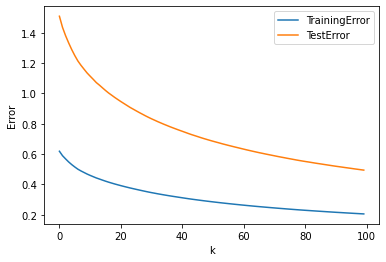

In [37]:
plt.plot(recon_error_train,label='TrainingError')
plt.plot(recon_error_test,label='TestError')
plt.legend()
plt.xlabel('k')
plt.ylabel('Error')

Text(0, 0.5, 'Value')

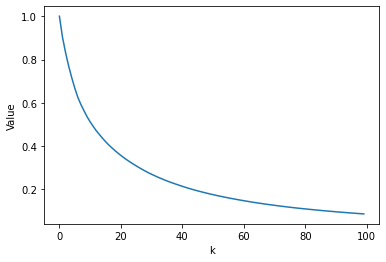

In [34]:
#A.3(c)
eig_weights = np.zeros(100)
for k in range(100):
    eig_weights[k] = 1-(np.sum(eigvals[0:k])/np.sum(eigvals))
plt.plot(eig_weights)
plt.xlabel('k')
plt.ylabel('Value')

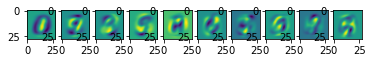

In [39]:
#A.3(d)
images = [eigvecs[:,j].reshape((28,28)) for j in range(10)]
im, arr = plt.subplots(1,10)
for j in range(10):
    arr[j].imshow(images[j])

In [8]:
#find indices of images of 2, 6, and 7
index2=0
index6=0
index7=0
for j in range(100):
    if labels_train[j]==2:
        index2=j
    elif labels_train[j]==6:
        index6=j
    elif labels_train[j]==7:
        index7=j
    if index2 != 0 and index6 != 0 and index7 != 0:
        break

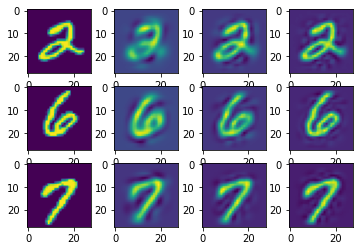

In [11]:
#A,3(e)
two_true = X_train[index2,:].reshape((28,28))
six_true = X_train[index6,:].reshape((28,28))
seven_true = X_train[index7,:].reshape((28,28))
k_values = [32,64,128]
im, arr = plt.subplots(3,4)
arr[0,0].imshow(two_true)
arr[1,0].imshow(six_true)
arr[2,0].imshow(seven_true)
for i in range(3):
    Uk = Uk = eigvecs[:,0:k_values[i]]
    two_approx = (mu + np.transpose((Uk@np.transpose(Uk))@(X_train[index2,:]-mu))).reshape((28,28))
    six_approx = (mu + np.transpose((Uk@np.transpose(Uk))@(X_train[index6,:]-mu))).reshape((28,28))
    seven_approx = (mu + np.transpose((Uk@np.transpose(Uk))@(X_train[index7,:]-mu))).reshape((28,28))
    arr[0,i+1].imshow(two_approx)
    arr[1,i+1].imshow(six_approx)
    arr[2,i+1].imshow(seven_approx)

In [ ]:
#A.5

In [1]:
from mnist import MNIST
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    mndata = MNIST('/Users/joseph/Courses/cse546/hw2/mnist')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return [X_train, labels_train, X_test, labels_test]

[X_train, labels_train, X_test, labels_test] = load_dataset()

In [40]:
def lloyd(data,k):
    n, d = np.size(data,0), np.size(data,1)
    change = 1
    centroids = np.random.rand(k,d)  #stores centroids k centroid points as matrix
    close_centroid = 0  #will store which centroid is closest to given point
    for iter in range(6):
        num_points = np.zeros(k)  #how many points are closest to each centroid
        centroids_new = np.zeros((k,d))
        for j in range(n):
            x = data[j,:]  #stores data point
            min_dist = 100 #to determine which centroid x is closest to
            for i in range(k):
                distance = la.norm(x-centroids[i,:])
                if (distance < min_dist):
                    min_dist = distance
                    close_centroid = i
            centroids_new[close_centroid,:] += x
            num_points[close_centroid] += 1   #add 1 to counter for that centroid
        for j in range(k):
            if num_points[j]==0:
                centroids_new[j,:] = 0
            else:
                centroids_new[j,:] /= num_points[j]  #average each centroid
        change = np.sum([la.norm(centroids[i,:] - centroids_new[i,:]) for i in range(k)]) / k
        #copy centroids_new into centroids
        centroids = centroids_new
        #plt.figure(iter)
        #im, arr = plt.subplots(1,10)
        #for i in range(10):
        #    arr[i].imshow(np.reshape(centroids_new[i,:], (28,28)))
    return centroids_new
        

<Figure size 432x288 with 0 Axes>

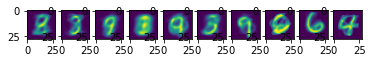

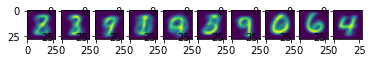

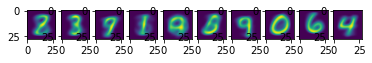

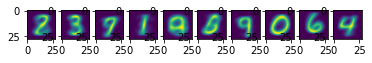

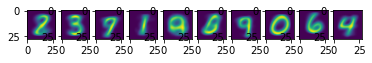

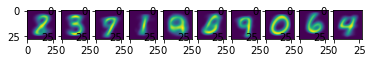

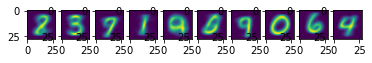

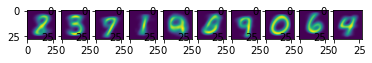

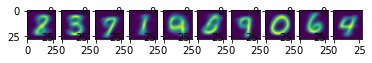

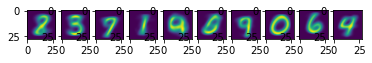

In [26]:
n, d = 60000, 784
k = 10
lloyd(X_train,k)

In [41]:
train_errors = np.zeros(5)
test_errors = np.zeros(5)
kmeans_2 = lloyd(X_train,2)
kmeans_4 = lloyd(X_train,4)
kmeans_8 = lloyd(X_train,8)
kmeans_16 = lloyd(X_train,16)
kmeans_32 = lloyd(X_train,32)

In [42]:
for j in range(n):
    x = X_train[j,:]
    distance = np.min([la.norm(x-kmeans_2[i,:]) for i in range(2)])
    train_errors[0] += distance
    distance = np.min([la.norm(x-kmeans_4[i,:]) for i in range(4)])
    train_errors[1] += distance
    distance = np.min([la.norm(x-kmeans_8[i,:]) for i in range(8)])
    train_errors[2] += distance
    distance = np.min([la.norm(x-kmeans_16[i,:]) for i in range(16)])
    train_errors[3] += distance
    distance = np.min([la.norm(x-kmeans_32[i,:]) for i in range(32)])
    train_errors[4] += distance
train_errors /= n

for j in range(10000):
    x = X_test[j,:]
    distance = np.min([la.norm(x-kmeans_2[i,:]) for i in range(2)])
    test_errors[0] += distance
    distance = np.min([la.norm(x-kmeans_4[i,:]) for i in range(4)])
    test_errors[1] += distance
    distance = np.min([la.norm(x-kmeans_8[i,:]) for i in range(8)])
    test_errors[2] += distance
    distance = np.min([la.norm(x-kmeans_16[i,:]) for i in range(16)])
    test_errors[3] += distance
    distance = np.min([la.norm(x-kmeans_32[i,:]) for i in range(32)])
    test_errors[4] += distance
test_errors /= 10000

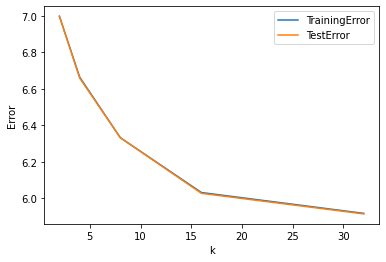

In [45]:
plt.plot([2,4,8,16,32],train_errors, label="TrainingError")
plt.plot([2,4,8,16,32],test_errors,label='TestError')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()

In [ ]:
# B.1

In [1]:
import csv
import numpy as np
from numpy import linalg as la
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
import math

In [2]:
data = []
with open('u.data') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    for row in spamreader:
        data.append([int(row[0])-1, int(row[1])-1, int(row[2])])
data = np.array(data)

num_observations = len(data) # num_observations = 100,000
num_users = max(data[:,0])+1 # num_users = 943, indexed 0,...,942
num_items = max(data[:,1])+1 # num_items = 1682 indexed 0,...,1681

np.random.seed(1)
num_train = int(0.8*num_observations)
perm = np.random.permutation(data.shape[0])
train = data[perm[0:num_train],:]
test = data[perm[num_train::],:]

In [3]:
def calc_error(R,R_hat):
    return np.nanmean((R-R_hat)**2)

In [4]:
# create spare matrix of user movie ratings
R = np.zeros((num_items,num_users))
for i in range(len(train)):
    R[train[i,1],train[i,0]] = train[i,2]
for i in range(num_items):
    for j in range(num_users):
        if R[i,j] == 0:
            R[i,j] = np.nan

R_test = np.zeros((num_items,num_users))
for i in range(len(test)):
    R_test[test[i,1],test[i,0]] = test[i,2]
for i in range(num_items):
    for j in range(num_users):
        if R_test[i,j] == 0:
            R_test[i,j] = np.nan

In [5]:
#B.1(a)
num_ratings = np.zeros(num_items) #store how many ratings each movie has
avg_ratings = np.zeros(num_items) #store each movies average ratings
for i in range(len(train)):
    avg_ratings[train[i,0]] += train[i,2]
    num_ratings[train[i,0]] += 1
for i in range(len(num_ratings)):
    if num_ratings[i] == 0:
        num_ratings[i] = 1
avg_ratings /= num_ratings
avg_ratings_mtx = np.zeros((num_items,num_users))
for i in range(num_users):
    avg_ratings_mtx[:,i] = avg_ratings

In [6]:
print(calc_error(R_test,avg_ratings_mtx))

2.261540452277984


In [7]:
R_til = np.zeros((num_items,num_users))
for i in range(len(train)):
    R_til[train[i,1],train[i,0]] = train[i,2]
d_values = [1,2,5,10,20,50]
train_error=[]
test_error=[]
U,S,V = linalg.svd(R_til,full_matrices=False)
S = np.diag(S)
for d in d_values:
    R_hat = U[:,0:d] @ S[0:d,0:d] @ V[0:d,:]
    train_error.append(calc_error(R,R_hat))
    test_error.append(calc_error(R_test,R_hat))

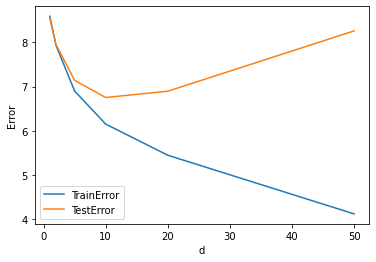

In [8]:
plt.plot(d_values,train_error,label='TrainError')
plt.plot(d_values,test_error,label='TestError')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()

In [ ]:
# B.1 (c)

In [27]:
def loss_func(R,U,V,lam):
    return np.nansum((U@np.transpose(V) - R)**2) + lam*(la.norm(U)**2 + la.norm(V)**2)

def trainer(R,R_til,d,lam,sigma):
    U = sigma*np.random.rand(num_items,d)
    V = sigma*np.random.rand(num_users,d)
    I = np.eye(d)
    loss = loss_func(R,U,V,lam)
    diff = 21
    while diff > .1:
        new_U = np.transpose(la.inv(np.transpose(V)@V + lam*I) @ np.transpose(V)@np.transpose(R_til))
        new_V = np.transpose(la.inv(np.transpose(new_U)@new_U + lam*I) @ np.transpose(new_U)@R_til)
        diff = max([la.norm(U-new_U), la.norm(V-new_V)])
        V = new_V
        U = new_U
    loss = loss_func(R,U,V,lam)
    return U,V,loss

In [28]:
d_values = [1,2,5,10,20,50]
train_error=[]
test_error=[]
for d in d_values:
    U,V,loss = trainer(R,R_til,d,0.1,math.sqrt(5/d))
    train_error.append(calc_error(R,U@np.transpose(V)))
    test_error.append(calc_error(R_test,U@np.transpose(V)))
    print(f'Finished Running Experiment: {d}')

Finished Running Experiment: 1
Finished Running Experiment: 2
Finished Running Experiment: 5
Finished Running Experiment: 10
Finished Running Experiment: 20
Finished Running Experiment: 50


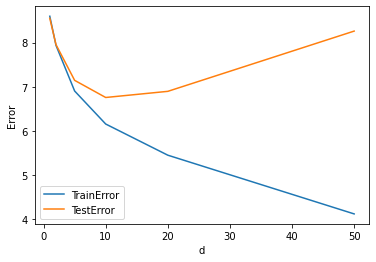

In [29]:
plt.plot(d_values,train_error,label='TrainError')
plt.plot(d_values,test_error,label='TestError')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()

In [128]:
#B1(d)
import torch 
train_torch = torch.tensor(train)
test_torch = torch.tensor(test)
R_torch = torch.zeros(R.shape)
R_test_torch = torch.tensor(R_test)
R_til_torch = torch.tensor(R_til)
def loss_func_tor(R_torch,U,V,lam):
    return torch.nansum((torch.mm(U,torch.transpose(V,0,1)) - R_torch)**2) + lam*(torch.linalg.norm(U)**2 + torch.linalg.norm(V)**2)
def calc_error_tor(R,R_hat,batch_size):
    return torch.nansum(torch.square(R-R_hat)) / batch_size
def trainer_SGD(R_torch,R_til_torch,d,lam,sigma,batch_size):
    U = sigma*torch.rand((num_items,d),requires_grad=True)
    V = sigma*torch.rand((num_users,d),requires_grad=True)
    for i in range(100):
        batch = torch.randint(0,train_torch.shape[0],(batch_size,))
        for i in range(batch_size):
            R_torch[train[batch[i],1],train[batch[i],0]] = R[train[batch[i],1],train[batch[i],0]]
        loss = loss_func_tor(R_torch,U,V,lam)
        U.retain_grad()
        V.retain_grad()
        loss.backward(retain_graph=True)
        with torch.no_grad():
            U -= (.001/(i+1))*U.grad
            V -= (.001/(i+1))*V.grad
            U.grad.zero_()
            V.grad.zero_()
    return U,V,loss.item()

In [129]:
d_values = [1,2,5,10,20,50]
train_error=[]
test_error=[]
for d in d_values:
    U,V,loss = trainer_SGD(R_torch,R_til_torch,d,0.1,math.sqrt(5/d),20000)
    train_error.append(calc_error_tor(R_torch,torch.mm(U,torch.transpose(V,0,1)),80000))
    test_error.append(calc_error_tor(R_test_torch,torch.mm(U,torch.transpose(V,0,1)),20000))
    print(f'Finished Running Experiment: {d}')

Finished Running Experiment: 1
Finished Running Experiment: 2
Finished Running Experiment: 5
Finished Running Experiment: 10
Finished Running Experiment: 20
Finished Running Experiment: 50


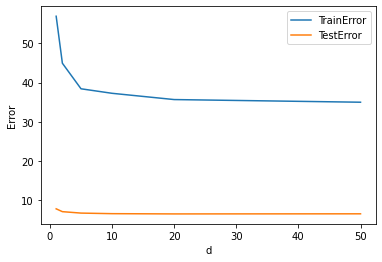

In [130]:
plt.plot(d_values,train_error,label='TrainError')
plt.plot(d_values,test_error,label='TestError')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()